In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryBlackHoleMergers/data.h5
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryBlackHoleMergers/data_diff_imf.h5
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryBlackHoleMergers/data_lowZ.h5
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryBlackHoleMergers/data_wkicks.h5
"""

'\n!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryStars/data.h5\n!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryStars/data_diff_imf.h5\n!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryStars/data_lowZ.h5\n!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/BinaryStars/data_wkicks.h5\n'


<img src="7u5yfddeXVJP73NzbtNgnE-1024-80.jpg" style="width:30vw">

# 0. Binary Stars!

Binary stars are very common in the universe. As a graduate student my work focus on binary stars that evolve to become merging binary black holes!

This project is intended to show you one way astronomers use observations of binary black hole mergers to inform our understanding of the universe.


#### 0a. Watch this "Crash Course" video on binary stars.
https://www.youtube.com/watch?v=pIFiCLhJmig


#### 0b. Watch this video too. It goes more into detail about how binary stars can interact with one another. 

At time=3:46 in the video talks about the complicated evolution of binary stars. 

This is type of evolution is what allows for the formation of binary black hole systems!

https://www.youtube.com/watch?v=AnE9EYgXxpU


#### ~~ Other cool videos about black holes to watch on your own:

2017: Graduate student Katie Bouman describing how her team will take a picture of a super massive black hole
https://www.youtube.com/watch?v=BIvezCVcsYs 

2019: Vox video showing 
https://www.youtube.com/watch?v=pAoEHR4aW8I

#  In this notebook you will be using simulation data from the code COSMIC. 

This code is used to simulate binary evoltion and was developed by graduate students, post-docs, and faculty in CIERA. 

It builds on previous work to model complicated binary evolution very quickly.

Ideally we would model the complicated stellar interactions using fluid simulations like this https://aasnova.org/2016/02/29/featured-image-orbiting-stars-share-an-envelope/ but we don't fully understand the physics involved and those simulations take a long time to finish.

The data I am giving you starts with a large initial popultion of stars with initial conditions that are supposed to replicate binary systems in the universe. COSMIC evolves those binaries through time.

### 0c. When binary stars were formed in the universe what do you think they looked like? Go on Slack and answer the first 2 anonymous polls. You aren't supposed to know the answer. This is just to get your brain thinking about binary stars!

# 1. Histograms 

## We are going to be using histograms a lot in this exercise to visualize our binary populations. 1a is supposed to help you become comfortable with them.

A histogram is a helpful way to bin a list of numbers. 



### 1a. use np.random.randint to make a random list of numbers. 

low = lower bound for random numbers

high = upper bound for random numbers

size = how many numbers you want, start with something >20

In [3]:
# make a random list of intergers betweeen 2 numbers
data = np.random.randint(low=10, high=50, size=100)
print(data)

[19 29 40 44 17 19 40 48 49 12 49 22 11 28 43 46 15 35 31 43 13 38 31 40
 35 49 10 30 20 19 42 38 46 10 35 18 46 18 39 19 48 26 18 39 26 32 43 18
 27 31 27 24 44 11 15 24 40 24 11 31 28 24 47 44 42 22 13 13 16 35 41 29
 10 31 40 38 23 21 42 22 20 44 48 46 23 41 29 13 30 48 41 13 12 18 49 41
 18 22 20 33]


### 1b. Use plt.hist to bin your random numbers

data = list of random numbers

bins = number of bins

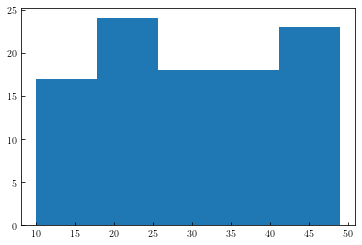

In [4]:
plt.figure()
# feed in the array named data, place the values into 5 bins
h = plt.hist(data, bins=5)

### 1c. Change the number of bins to a large number to see what happends to the data.   

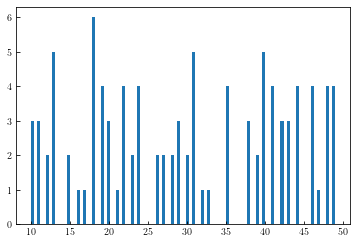

In [5]:
# change the number of bins here
plt.figure()
h = plt.hist(data, bins=100)

# Okay, lets finally read in the COSMIC data.

In [6]:
# There are three different sections to the data
# You will learn what they all mean separately! 

binaries_initCond = pd.read_hdf('data.h5', key='initCond')
binaries_bcm = pd.read_hdf('data.h5', key='bcm')
binaries_bpp = pd.read_hdf('data.h5', key='bpp')

# binaries_initCond
Gives information about the initial conditions of the binaries.  binaries_initCond will show you one possible answer to the questions on the polls.

You can look at all the available data by seeing what columns you can access:


In [7]:
binaries_initCond.columns

Index(['kstar_1', 'kstar_2', 'mass1_binary', 'mass2_binary', 'porb', 'ecc',
       'metallicity', 'binfrac', 'tphysf', 'mass0_1',
       ...
       'fprimc_6', 'fprimc_7', 'fprimc_8', 'fprimc_9', 'fprimc_10',
       'fprimc_11', 'fprimc_12', 'fprimc_13', 'fprimc_14', 'fprimc_15'],
      dtype='object', length=124)

You can go to this website to see what some of these columns mean: 
https://cosmic-popsynth.github.io/docs/v3.2.0/output_info/index.html

You can Ctrl+F or Command+F to search for the column name


##  Play around with the data
### 1d) Make histograms using plt.hist and plots using plt.scatter to see the initial conditions of these binaries.

### 1e) Write a sentence or two about what you see.

For example, if you plot **plt.hist(np.log10(binaries_initCond['porb']), bins=10, color='gray')**
you can write something like: 

"This is the distribution for the initial periods of the binaries.
Large periods mean they start far away from each other, small periods mean they start close together.
Most of the binaries star with small or medium valued orbital periods and fewer start with large orbital periods"

**check if this is true!**

**Some other interesting columns are 'ecc', 'mass0_1, and binaries_initCond['mass0_2']/binaries_initCond['mass0_1']**

## Bonus 

Make your own histogram funtion! (It's a little more ticky than you might think!)
There are so many functions that are already made for you but there is value in builing them yourself! This is the best way to really understand what the function is doing


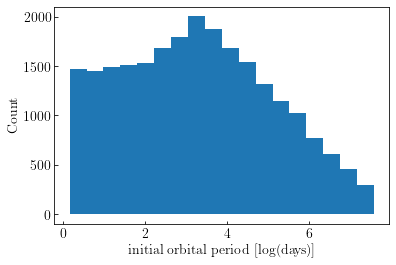

In [8]:
def plot_hist(data, bins ):
    
    bin_edges = np.linspace(data.min()*0.999, data.max()*1.001, bins)
    bin_vals = np.zeros(bins-1)
    
    for i in range(len(data)):
        for j in range(bins-1):
            if bin_edges[j] <= data.to_numpy()[i] < bin_edges[j+1]:
                bin_vals[j] += 1
                break
                
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plt.fill_between(bin_edges[0:-1], bin_vals, step="post")

    return (fig, ax), bin_vals
    
data = np.log10(binaries_initCond['porb'])
bins = 20

(fig, ax), bin_vals = plot_hist(data, bins )

ax.set_xlabel('initial orbital period [log(days)]', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

ax.tick_params('both', labelsize=14)


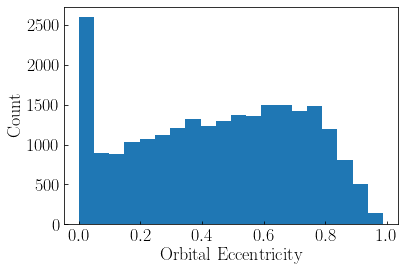

In [9]:
h = plt.hist(binaries_initCond['ecc'], bins=20)
plt.xlabel("Orbital Eccentricity", size=18)
plt.ylabel("Count", size=18)
plt.gca().tick_params("both", labelsize=18)

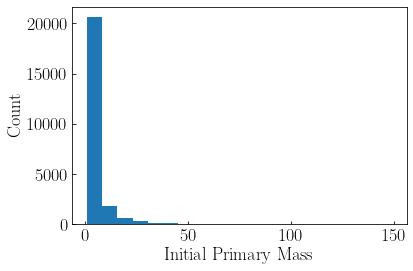

In [10]:
h = plt.hist(binaries_initCond['mass0_1'], bins=20)
plt.xlabel("Initial Primary Mass", size=18)
plt.ylabel("Count", size=18)
plt.gca().tick_params("both", labelsize=18)

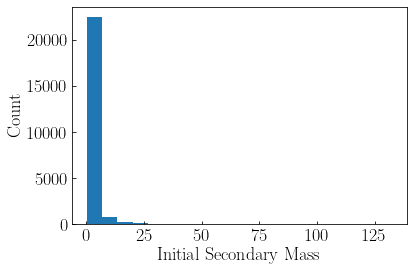

In [11]:
h = plt.hist(binaries_initCond['mass0_2'], bins=20)
plt.xlabel("Initial Secondary Mass", size=18)
plt.ylabel("Count", size=18)
plt.gca().tick_params("both", labelsize=18)

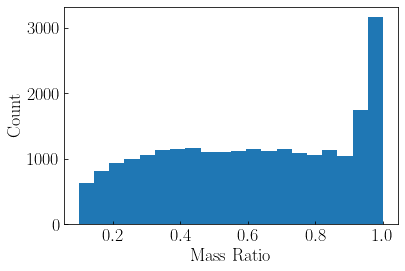

In [12]:
# use this cell to check the answer to Poll #2
# to check it you need to plot the mass ratio, q
# q = m2/m1 (smaller mass/ larger mass)
# values close to 1 mean the masses are similar
# values close to 0 mean the masses are very different

h = plt.hist(binaries_initCond['mass0_2']/binaries_initCond['mass0_1'], bins=20)
plt.xlabel("Mass Ratio", size=18)
plt.ylabel("Count", size=18)
plt.gca().tick_params("both", labelsize=18)

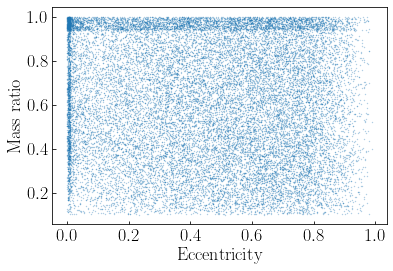

In [13]:
plt.scatter(binaries_initCond["ecc"], binaries_initCond["mass0_2"]/binaries_initCond["mass0_1"], alpha=0.5, s=0.1)
plt.xlabel("Eccentricity", size=18)
plt.ylabel("Mass ratio", size=18)
plt.gca().tick_params("both", labelsize=18)

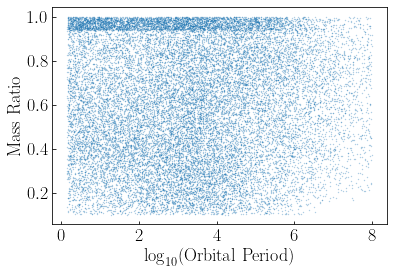

In [14]:
plt.scatter(np.log10(binaries_initCond["porb"]), binaries_initCond["mass0_2"]/binaries_initCond["mass0_1"], alpha=0.5, s=0.1)
plt.xlabel("$\log_{10}$(Orbital Period)", size=18)
plt.ylabel("Mass Ratio", size=18)
plt.gca().tick_params("both", labelsize=18)

# 2 binaries_bcm

binaries_bcm has information about the last timestep in the data, tphys=13700.0. 

It can tell you things like: There is a black hole with a white dwarf. Their orbital period is 5 solar radii and their eccentricity is 0.2

Let's look at the columns again

In [15]:
binaries_bcm.columns

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lumin_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'ospin_1',
       'deltam_1', 'RROL_1', 'kstar_2', 'mass0_2', 'mass_2', 'lumin_2',
       'rad_2', 'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'ospin_2', 'deltam_2', 'RROL_2', 'porb', 'sep', 'ecc', 'B_0_1', 'B_0_2',
       'SNkick_1', 'SNkick_2', 'Vsys_final', 'SNtheta_final', 'SN_1', 'SN_2',
       'bin_state', 'merger_type'],
      dtype='object')

In [16]:
binaries_bcm 

,tphys,kstar_1,mass0_1,mass_1,lumin_1,rad_1,teff_1,massc_1,radc_1,menv_1,...,B_0_1,B_0_2,SNkick_1,SNkick_2,Vsys_final,SNtheta_final,SN_1,SN_2,bin_state,merger_type
bin_num,,,,,,,,,,,,,,,,,,,,,
43,13700.0,11.0,0.681683,0.681797,1.194858e-06,0.011720,1770.634861,0.681797,0.011720,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
48,13700.0,11.0,0.561583,0.561583,3.030016e-06,0.013310,2096.700696,0.561583,0.013310,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
63,13700.0,11.0,0.583973,0.583973,1.376591e-06,0.012997,1741.991851,0.583973,0.012997,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
67,13700.0,11.0,0.642558,0.642558,1.513869e-06,0.012217,1839.968303,0.642558,0.012217,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
207,13700.0,12.0,1.342178,1.342529,2.076692e-06,0.002203,4688.965744,1.342529,0.002203,1.000000e-10,...,0.000000e+00,5.918924e+10,0.0,11.936679,0.0,0.0,0.0,2.0,0,-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849878,13700.0,13.0,8.942471,1.277515,1.264548e-10,0.000014,5196.242457,1.277515,0.000014,1.000000e-10,...,3.758326e+10,0.000000e+00,0.0,0.000000,0.0,0.0,1.0,0.0,1,0201
849883,13700.0,11.0,0.932444,0.932444,1.470797e-06,0.008815,2150.501892,0.932444,0.008815,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,1,0501
849908,13700.0,11.0,0.933878,0.933878,1.467231e-06,0.008799,2151.153012,0.933878,0.008799,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001


In [17]:
# this is how you would look at all the values from 'RROL_2'
binaries_bcm['RROL_2'].values

array([7.38330000e-07, 2.06408259e-03, 7.34496179e-03, ...,
       3.40529724e-05, 2.33898587e-03, 1.00000000e-04])

### Using **binaries_initCond** and **binaries_bcm** we can see the initial and final snapshot of each binary. 

### 2a) Using binaries_initCond find the total mass in stellar objects in the initial conditions
for binaries_initCond you will want to use the columns mass0_1 and mass0_2

you can use np.sum() to sum up all the values

In [18]:
mass1_initial_total = binaries_initCond["mass0_1"].sum()
mass2_initial_total = binaries_initCond["mass0_2"].sum()

total_initial_mass = mass1_initial_total + mass2_initial_total
print(total_initial_mass)

188596.28805181838


### 2b) Go on Slack and fill out the anonymous Poll #3. It asks how much initial mass you found. What are the units?

### 2c) Using binaries_bcm find the total mass in stellar object in the final conditions
for binaries_bcm you will want to use the columns mass_1 and mass_2

In [19]:
mass1_final_total = binaries_bcm["mass_1"].sum()
mass2_final_total = binaries_bcm["mass_2"].sum()

total_final_mass = mass1_final_total + mass2_final_total
print(total_final_mass)

49517.30877161359


### 2d. Find the ratio of final mass in all binaries to the initial mass.
This gives you the fraction of mass that is remaining. It should be less than one. 


In [20]:
fraction = total_final_mass/total_initial_mass
print(fraction)

0.26255717587616734


### 2e Fill out anonymous Poll #4 requesting ideas about how the mass was ejected.

## Lets look at specific rows in binaries_bcm

How do we access the same binary in binaries_initCond and binaries_bcm?

Each binary has its own unique number. In this data frame the unique number is its index value (the first column called bin_num). Run this cell to see

In [21]:
binaries_bcm

,tphys,kstar_1,mass0_1,mass_1,lumin_1,rad_1,teff_1,massc_1,radc_1,menv_1,...,B_0_1,B_0_2,SNkick_1,SNkick_2,Vsys_final,SNtheta_final,SN_1,SN_2,bin_state,merger_type
bin_num,,,,,,,,,,,,,,,,,,,,,
43,13700.0,11.0,0.681683,0.681797,1.194858e-06,0.011720,1770.634861,0.681797,0.011720,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
48,13700.0,11.0,0.561583,0.561583,3.030016e-06,0.013310,2096.700696,0.561583,0.013310,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
63,13700.0,11.0,0.583973,0.583973,1.376591e-06,0.012997,1741.991851,0.583973,0.012997,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
67,13700.0,11.0,0.642558,0.642558,1.513869e-06,0.012217,1839.968303,0.642558,0.012217,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001
207,13700.0,12.0,1.342178,1.342529,2.076692e-06,0.002203,4688.965744,1.342529,0.002203,1.000000e-10,...,0.000000e+00,5.918924e+10,0.0,11.936679,0.0,0.0,0.0,2.0,0,-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849878,13700.0,13.0,8.942471,1.277515,1.264548e-10,0.000014,5196.242457,1.277515,0.000014,1.000000e-10,...,3.758326e+10,0.000000e+00,0.0,0.000000,0.0,0.0,1.0,0.0,1,0201
849883,13700.0,11.0,0.932444,0.932444,1.470797e-06,0.008815,2150.501892,0.932444,0.008815,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,1,0501
849908,13700.0,11.0,0.933878,0.933878,1.467231e-06,0.008799,2151.153012,0.933878,0.008799,1.000000e-10,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0,-001


You can access the unique index numbers by doing the following

In [22]:
# binaries_bcm.index gives you the numbers, adding .values at the end puts it in to an array
# binaries_bcm.index.values

binary_index_vals = binaries_bcm.index.values
binary_index_vals

array([    43,     48,     63, ..., 849908, 849932, 849955])

In [23]:
# you can access the elements in the array by doing:

print('0th element', binary_index_vals[0])
print('1st element', binary_index_vals[1])

0th element 43
1st element 48


## If you have the row's index number (binary_index_vals = binaries_bcm.index.values) you use .loc to access the data for that index

In [24]:
print(binaries_bcm.loc[binary_index_vals[0]])

# remember binary_index_vals[0] will give you the unique binary values

tphys                  13700
kstar_1                   11
mass0_1             0.681683
mass_1              0.681797
lumin_1          1.19486e-06
rad_1              0.0117203
teff_1               1770.63
massc_1             0.681797
radc_1             0.0117203
menv_1                 1e-10
renv_1                 1e-10
epoch_1              1229.14
ospin_1              438.321
deltam_1                   0
RROL_1           5.92058e-07
kstar_2                   11
mass0_2              0.55895
mass_2               0.55895
lumin_2           4.5552e-06
rad_2              0.0133478
teff_2               2318.42
massc_2              0.55895
radc_2             0.0133478
menv_2                 1e-10
renv_2                 1e-10
epoch_2              9539.72
ospin_2          4.78178e-06
deltam_2                   0
RROL_2            7.3833e-07
porb             1.16106e+06
sep                  49960.2
ecc                 0.630347
B_0_1                      0
B_0_2                      0
SNkick_1      

Lets look at the final and initial values for one binary

In [25]:
print('Looking at initial conditions:')
print(binaries_initCond.loc[binary_index_vals[2]],'\n')


print('Looking at final conditions:')
print(binaries_bcm.loc[binary_index_vals[2]])

# you might get some weird output for the binaries_initCond. This is because I am using an older version of COSMIC
# and the developed probably fixed that in the newer version

Looking at initial conditions:
kstar_1             1.000000
kstar_2             1.000000
mass1_binary        1.228828
mass2_binary        0.761809
porb            17450.861906
                    ...     
fprimc_11           0.095238
fprimc_12           0.095238
fprimc_13           0.095238
fprimc_14           0.095238
fprimc_15           0.095238
Name: 63, Length: 124, dtype: float64 

Looking at final conditions:
tphys                  13700
kstar_1                   11
mass0_1             0.583973
mass_1              0.583973
lumin_1          1.37659e-06
rad_1              0.0129972
teff_1               1741.99
massc_1             0.583973
radc_1             0.0129972
menv_1                 1e-10
renv_1                 1e-10
epoch_1              3609.09
ospin_1               6.2139
deltam_1         6.93998e-17
RROL_1           3.05781e-05
kstar_2                    3
mass0_2             0.836269
mass_2              0.836113
lumin_2              7.67872
rad_2                3.67796
t

## IMPORTANT: look before moving on



So far you have looked at entire columns in the data but what if you only want one row in one column?

.iloc and .loc are used for that **BUT** .iloc and .loc are very different.

.iloc doesn't care about the index (in this case the unique bin_num) of the row. It only cares about the position of the row in the data, similar to how you access a normal array. Use this when you want to call data as if it were in an array

.loc is used with the row index (in this case the unique bin_num). 

make sure you understand this before moving on!

There are different ways to access specific rows in your columns. These are the ways it makes the most sense to me:

In [26]:
# here I look at the column named rad_1
print('Entire column:')
print(binaries_bcm['rad_1'])

# putting the unique index/bin_num values in an array
binary_index_vals = binaries_bcm.index.values

# here I look at the column rad_1 but only the first row.
# to access the first row with loc we use the row's index value: index value = binary_index_vals[0]
# remember, since we are using the index values we have to use loc, not iloc
print(' -----------')
print('Just first row with .loc')
index_value = binary_index_vals[0]
print('index value = ', index_value)
print(binaries_bcm['rad_1'].loc[index_value])


# to access the first row with iloc we can access it like a numpy array
print(' -----------')
print('Just first row with .iloc')
i_value = 0
print(binaries_bcm['rad_1'].iloc[i_value])

Entire column:
bin_num
43        0.011720
48        0.013310
63        0.012997
67        0.012217
207       0.002203
            ...   
849878    0.000014
849883    0.008815
849908    0.008799
849932    0.012979
849955    0.006027
Name: rad_1, Length: 23896, dtype: float64
 -----------
Just first row with .loc
index value =  43
0.011720317087414552
 -----------
Just first row with .iloc
0.011720317087414552


### Another important note:

Think carefully when you want to use .iloc or .loc.

If you are just looking in one data frame then .iloc is probably fine.

If you want to access the same binary in the datafram binaries_bcm and binaries_initCond it is better to use .loc. You can use .iloc BUT are you sure that .iloc[0] will give you the same binary every time? It is much more safe to use .loc because you know that the index values are unique to each binary.

# 3. Mass in black holes

The point of this section is to get more comfortable with the accessing the data. 

### 3a) Use binaries_bcm to find the total mass in the last snapshot that is only in black holes.

Tip: You can do this using a for loop but it can be done MUCH faster if you use something like np.where()
Look at this stack overflow link on np.where https://stackoverflow.com/questions/34667282/numpy-where-detailed-step-by-step-explanation-examples

You can find which objects are black holes using the "kstar_1" and "kstar_2" columns. Here is what the numbers represent. 

https://cosmic-popsynth.github.io/docs/v3.2.0/output_info/index.html


In [27]:
# here is a mini tutorial if you are stuck using np.where


a = np.arange(0,10)
print('a =', a, '\n')

print('I want to find the indicies where this condition is met a<5.')
print('a<5 =', a<5, '\n')

print('Using np.where like this will give you the indicies where the condition is met')
where_true = np.where(a<5)[0]
print('np.where(a<5)[0] = ', where_true, '\n')

print('Now I can go back to my array "a" and call those elements')
print(a[where_true])


a = [0 1 2 3 4 5 6 7 8 9] 

I want to find the indicies where this condition is met a<5.
a<5 = [ True  True  True  True  True False False False False False] 

Using np.where like this will give you the indicies where the condition is met
np.where(a<5)[0] =  [0 1 2 3 4] 

Now I can go back to my array "a" and call those elements
[0 1 2 3 4]


In [28]:
bh1_indices = binaries_bcm["kstar_1"] == 14
bh2_indices = binaries_bcm["kstar_2"] == 14

In [29]:
bh1_mass_total = binaries_bcm["mass_1"][bh1_indices].sum()
bh2_mass_total = binaries_bcm["mass_2"][bh2_indices].sum()

In [30]:
bh_mass_total = bh1_mass_total + bh2_mass_total
print("Total mass in black holes:", bh_mass_total)

Total mass in black holes: 19863.036246723994


### 3b) What is the fraction of BH mass at the end of simulation to the total mass at the end of the simulation?

In [31]:
bh_mass_fraction = bh_mass_total / total_final_mass
print("BH Mass Fraction", bh_mass_fraction)

BH Mass Fraction 0.4011331944217195


### 3c) Go to Slack and answer anonymous Poll  #5 asking what fraction you got.

# 4. A look at the bpp


### We need to learn how to use binaries_bpp

binaries_bcm and binaries_iniCond have just one row for each binary. 

binaries_bpp contains multiple rows for each binary. Every row is a different time and represents a key evolutionary change. 

In [32]:
binaries_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RROL_1,RROL_2,...,SNkick,SNtheta,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2
bin_num,,,,,,,,,,,,,,,,,,,,,
43,986.912261,1.859723,0.911040,2.0,1.0,22386.896696,233049.908929,0.631639,0.000224,0.000120,...,0.0,0.0,986.912261,986.912261,9.869123e+02,8.870279e+03,0.243834,0.000000,2.213133,0.860116
43,997.787655,1.859667,0.911040,3.0,1.0,22387.345650,233059.256337,0.631639,0.000920,0.000120,...,0.0,0.0,997.868078,997.787654,9.869920e+02,8.870279e+03,0.255926,0.000000,9.101527,0.860356
43,1012.288406,1.859107,0.911040,4.0,1.0,22391.868768,233153.440622,0.631639,0.002944,0.000120,...,0.0,0.0,1012.368829,1012.288399,9.869920e+02,8.870279e+03,0.347149,0.000000,29.126862,0.860676
43,1224.072127,1.852237,0.911040,5.0,1.0,22447.542342,234314.268737,0.631639,0.002376,0.000121,...,0.0,0.0,1224.152551,1224.072055,9.869920e+02,8.870279e+03,0.598613,0.000000,23.548494,0.865432
43,1227.998917,1.844461,0.911042,6.0,1.0,22510.772349,235636.701249,0.631638,0.024281,0.000120,...,0.0,0.0,1228.079341,1227.992002,9.869920e+02,8.870229e+03,0.598613,0.000000,241.090949,0.865523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849955,199.692137,1.133781,1.834748,11.0,9.0,40.102077,17.070154,0.000000,0.000480,8.654130,...,0.0,0.0,51.132768,5.304651,1.000000e+10,4.878980e+00,1.133781,1.224314,0.006507,146.168357
849955,199.692731,1.023226,1.762630,15.0,9.0,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.0,0.0,51.133362,5.305245,1.000000e+10,4.878980e+00,1.172685,1.225379,0.006027,146.645456
849955,199.773919,0.000000,1.757560,15.0,9.0,37.451687,20.022104,-1.000000,0.000480,8.654130,...,0.0,0.0,51.133362,5.386223,1.000000e+10,4.878980e+00,1.172685,1.439154,0.006027,265.377519


Lets once again get the unique index values so that we can access different binaries.

In [33]:
# put the index values in a numpy array for easy access
binary_index_not_unique_values = binaries_bpp.index.values 
binary_index_not_unique_values

array([    43,     43,     43, ..., 849955, 849955, 849955])

In [34]:
# this time we need to use np.unique since many rows have the same index
binary_index = np.unique(binaries_bpp.index.values )
binary_index

array([    43,     48,     63, ..., 849908, 849932, 849955])

In [35]:
# remember, since we are using the index values we have to use loc, NOT iloc
binaries_bpp.loc[binary_index[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RROL_1,RROL_2,...,SNkick,SNtheta,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2
bin_num,,,,,,,,,,,,,,,,,,,,,
43,986.912261,1.859723,0.911040,2.0,1.0,22386.896696,2.330499e+05,0.631639,2.237501e-04,1.203875e-04,...,0.0,0.0,986.912261,986.912261,9.869123e+02,8.870279e+03,0.243834,0.000000,2.213133,0.860116
43,997.787655,1.859667,0.911040,3.0,1.0,22387.345650,2.330593e+05,0.631639,9.201613e-04,1.204177e-04,...,0.0,0.0,997.868078,997.787654,9.869920e+02,8.870279e+03,0.255926,0.000000,9.101527,0.860356
43,1012.288406,1.859107,0.911040,4.0,1.0,22391.868768,2.331534e+05,0.631639,2.944300e-03,1.204290e-04,...,0.0,0.0,1012.368829,1012.288399,9.869920e+02,8.870279e+03,0.347149,0.000000,29.126862,0.860676
43,1224.072127,1.852237,0.911040,5.0,1.0,22447.542342,2.343143e+05,0.631639,2.376278e-03,1.206814e-04,...,0.0,0.0,1224.152551,1224.072055,9.869920e+02,8.870279e+03,0.598613,0.000000,23.548494,0.865432
43,1227.998917,1.844461,0.911042,6.0,1.0,22510.772349,2.356367e+05,0.631638,2.428075e-02,1.202276e-04,...,0.0,0.0,1228.079341,1227.992002,9.869920e+02,8.870229e+03,0.598613,0.000000,241.090949,0.865523
43,1229.137962,0.681683,0.912848,11.0,1.0,38828.635540,7.017290e+05,0.630451,8.529278e-07,5.522411e-05,...,0.0,0.0,0.000000,1220.329478,9.869920e+02,8.806703e+03,0.681683,0.000000,0.011722,0.867220
43,8815.511569,0.681683,0.912848,11.0,2.0,38828.635541,7.017290e+05,0.630451,8.529278e-07,1.364077e-04,...,0.0,0.0,7586.373607,8806.703085,1.000000e+10,8.806703e+03,0.681683,0.128763,0.011722,2.142100
43,9008.135114,0.681683,0.912740,11.0,3.0,38831.253715,7.018237e+05,0.630451,8.528464e-07,1.885700e-04,...,0.0,0.0,7778.997151,9003.134210,1.000000e+10,8.810466e+03,0.681683,0.178985,0.011722,2.961362
43,9424.319419,0.681685,0.874391,11.0,4.0,39788.067808,7.368374e+05,0.630450,8.238804e-07,7.673563e-04,...,0.0,0.0,8195.181457,10986.823858,1.000000e+10,1.031103e+04,0.681685,0.493744,0.011722,12.232420


### 4a) Choose any binary you want. Make a plot  showing how the mass of the primary star "mass_1" changes over time "tphys".  Make sure you label you plots! What are the units?


**Tips:** 

You can access the data by doing:

binaries_bpp["column_name"].loc[binary_index_num].values

Text(0, 0.5, 'Primary Mass')

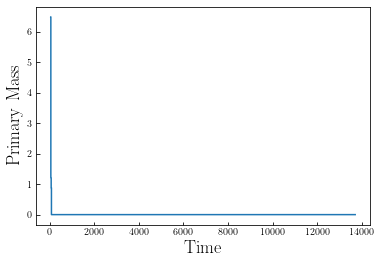

In [36]:
binary_index_num = np.random.choice(binary_index)

x = binaries_bpp["tphys"].loc[binary_index_num]
y = binaries_bpp["mass_1"].loc[binary_index_num]

plt.plot(x, y)
plt.xlabel("Time", size=18)
plt.ylabel("Primary Mass", size=18)

### 4b) Make a plot showing how the mass of the primary star "mass_1" and secondary star "mass_2" changes over time "tphys". Add labels so you can tell them apart

### Look through the binaries until you find a system like this:

<img src="mass_evolution.png">

### One mass is increasing while the other decreases. From the videos you watched, can you describe what is happening?

### 4c) Go to Slack and fill out the anonymous free response poll (Poll #6) asking what binary interaction explains the changes in mass

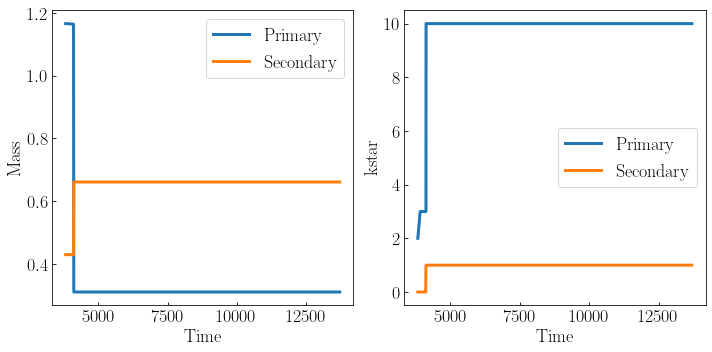

In [37]:
#i = np.random.choice(binary_index)
i = 654427

x = binaries_bpp["tphys"].loc[i]
y1 = binaries_bpp["mass_1"].loc[i]
y2 = binaries_bpp["mass_2"].loc[i]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].plot(x, y1, label="Primary", linewidth=3)
ax[0].plot(x, y2, label="Secondary", linewidth=3)
ax[0].set_xlabel("Time", size=18)
ax[0].set_ylabel("Mass", size=18)

ax[0].tick_params("both", labelsize=18)
ax[0].legend(fontsize=18)

y1 = binaries_bpp["kstar_1"].loc[i]
y2 = binaries_bpp["kstar_2"].loc[i]

ax[1].plot(x, y1, label="Primary", linewidth=3)
ax[1].plot(x, y2, label="Secondary", linewidth=3)
ax[1].set_xlabel("Time", size=18)
ax[1].set_ylabel("kstar", size=18)

ax[1].tick_params("both", labelsize=18)
ax[1].legend(fontsize=18)

fig.tight_layout()

# 5. Merging Binary Black holes

Watch these two videos about LIGO/Gravitational waves. 

https://www.youtube.com/watch?v=B4XzLDM3Py8

https://www.youtube.com/watch?v=4GbWfNHtHRg


### Now lets do something more challenging!


The goal of this section is for you to find out which binary black hole systems will merge within a Hubble time. What causes these black holes to merge? Gravitational waves emitted by the black holes orbiting each other take away energy from the orbit. When this happens the orbit shrinks. We can calculate how long it will take for two black holes to merge if gravitational waves are the only thing causing the orbit to lose energy.

Hubble time = the age of the universe = 13.8 billion years


You will need to find all the binaries where in the last timestep both objects are black holes. You then need to calculate the merger time ($t_{\rm merger}$) with the equations provided. 

### 5a) Calculate which binary black hole systems will merge within the age of the universe. Use the direction/tips below
### You need to create 3 arrays. 

- array to store the binary index of the merged binaries

- array to store the mass of the most massive BH before merger

- array to store the smaller mass BH before merger. 

A guide/tips: 

#### 1) You will need to access each binary similar to how you made the plots:

binaries_bpp["column_name"].loc[binary_index_number].values


#### 2) You need to check that both objects are black holes **kstar_1 == 14** and **kstar_2 == 14** in the last timestep

To look at the last element in an array you use array[-1]

Here it looks like binaries_bpp['column_name'].loc[binary_index_number].values**[-1]**

or 

np.array(binaries_bpp['column_name'].loc[binary_index_number])**[-1]**

#### 3) You need to get the values of eccentricity, separation, M1, M1, and time in the last timestep. Put them in CGS units
http://www.astro.wisc.edu/~dolan/constants.html


#### 4) Calculate t_merger
For circular orbits 

$$ t_{\rm merger, circular} = \frac{a^4}{4 \beta} $$

where $\beta = \frac{64}{5} \frac{G^3 m_1 m_2 (m_1 + m_2)}{c^5}$, $a$ is separation, $G$ is the gravitational constant, and $c$ is the speed of light. It is unlikely that a binary will be perfectly circular. 

For eccentricity < 0.5 use:


$$ t_{\rm merger} = \frac{c_{0}^4 }{4 \beta} e ^{48/19} $$

where $$c_{0} = \frac{a (1 - e^2)} { e^{12/19} \left[1 + \frac{121}{304}e^2 \right]^{870/2299} } $$


for eccentricity > 0.5 use:

$$ t_{\rm merger} = \frac{768}{425} t_{\rm merger, circular} (1 - e^2)^{7/2} $$

***These equations are from a paper from 1964! https://ui.adsabs.harvard.edu/abs/1964PhRv..136.1224P/abstract***

*** Notes:  ***

 - Some eccentricities = -1. This is not physical and means the black holes are not orbiting each other anymore. Find a way to ignore these. 

- You will have to keep track of the units. To do this you can change all simulation variables to cgs. The output of your t_merger calcuations will be in seconds

#### 5) Add your calculated t_merger to the time in the last timestep. Check if that sum is less than the age of the universe, 13.8 billion years. (remember that your t_merger is in seconds )

#### 6) If the time is less than 13.8 billion years, congratulations! You found a merging black hole binary system! 

#### 7) When you find a merging system save its data! In one array save the index of the merging binary. In another array save the mass of the more massive black hole before the merger, this is called the primary BH. In another array save the mass of the lower mass BH, this one is called the secondary  

In [38]:
# it is much easier and neater to write up equations in a function 
# when you are trying to calculate something many times

# see how you can make a function here 
def number_squared( x ):
    return x**2


# you can call functions inside other functions
def divide_by_2_after_square(x):
    squared = number_squared(x)
    return squared/2

number = 10 
print(number_squared( number ))
print(divide_by_2_after_square( number ))

print('*****NOTE****')
print('this is NOT how you should calculate (x**2) / 2')
print('this is just an example of how you may use functions for this exercise')

100
50.0
*****NOTE****
this is NOT how you should calculate (x**2) / 2
this is just an example of how you may use functions for this exercise


In [39]:
# Here is the function for beta to get you started, you just need to fill in G and c in cgs
def calc_beta(m1,m2):
    G = 6.67259e-8
    c = 2.99792458e10
    
    return (64./5.) * ( (G**3 * m1 * m2 * (m1+m2) ) /c**5 )
    
def calc_t_merger_small_e(m1, m2, s, e):
    c_0 = s * (1 - e**2) / (e**(12./19) * (1 + 121./304*e**2)**(870./2299))
    beta = calc_beta(m1, m2)
    
    t_merger = c_0**4 / (4.*beta) * e**(48./19)

    return t_merger

def calc_t_merger_big_e(m1, m2, s, e):
    beta = calc_beta(m1, m2)
    t_merger_circular = s**4 / (4.*beta)
    
    t_merger = 768./265 * t_merger_circular * (1. - e**2)**(7./2)
    
    return t_merger

def calc_t_merger(m1, m2, s, e):
    t_merger = np.where(e < 0.5, calc_t_merger_small_e(m1, m2, s, e), calc_t_merger_big_e(m1, m2, s, e))
    
    return t_merger

In [81]:
Msun = 1.99e33
Rsun = 6.96e10
sec_in_year = 3.154e7

# this is here incase you need something to get your started. you don't have to use a for loop 

merging_binaries=[]
primary_mass = []
secondary_mass = []

for index in binary_index:
    if binaries_bpp['kstar_1'].loc[index].values[-1] == 14 and \
            binaries_bpp["kstar_2"].loc[index].values[-1] == 14 and \
            binaries_bpp["ecc"].loc[index].values[-1] != -1:
        # We have a binary black hole, now check the merger time.
        
        mass1 = binaries_bpp["mass_1"].loc[index].values[-1]
        mass2 = binaries_bpp["mass_2"].loc[index].values[-1]
        eccentricity = binaries_bpp["ecc"].loc[index].values[-1]
        separation = binaries_bpp["sep"].loc[index].values[-1]
        
        t_merger = calc_t_merger(mass1*Msun, mass1*Msun, separation*Rsun, eccentricity) / sec_in_year
        
        # Add that to the time at the end of the simulation.
        
        t_last = binaries_bpp["tphys"].loc[index].values[-1]
        
        total_time = t_merger + t_last
        
        # Finally, check whether these systems merge on less than a Hubble time.
        
        if total_time < 13.8e9:
            merging_binaries.append(index)
            primary_mass.append(max(mass1,mass2))
            secondary_mass.append(min(mass1,mass2))
        
merging_binaries = np.array(merging_binaries)
primary_mass = np.array(primary_mass)
secondary_mass = np.array(secondary_mass)

print(merging_binaries)

[ 15633  29565  38389  47116  54432  64731  65533  73193  82380 104439
 120018 126063 136690 136791 140089 146990 162472 167034 182865 196071
 197086 202668 207724 214789 220733 248519 249059 249621 254188 267787
 274549 282671 292623 304100 306772 312249 322972 338278 353720 367492
 387990 444429 457342 460761 469061 481727 492483 495381 528331 541109
 548676 550320 575175 576275 611332 611715 615506 617040 656611 672405
 686301 724657 735493 736430 742307 744105 757908 764848 775293 793374
 794532 794652 839179]


### 5b) Find the fraction of binaries from your initial population that resulted in BBH mergers.

- Sum up the total number of binary black hole mergers. 
- Divide that number by the total number of initial binaries in the population.
    - Hint: Remember that each binary has a unique index.

In [41]:
total_merging_binaries = merging_binaries.size
total_initial_binaries = binary_index.size

merging_binaries_fraction = total_merging_binaries / total_initial_binaries

print("Fraction of merging binaries:", merging_binaries_fraction)

Fraction of merging binaries: 0.0030549045865416805


### 5c) Go to Slack and fill out the anonymous poll 7 asking: what fraction of the initial binaries merged as BBHs.

# 6a. Use plt.hist to compare the initial conditions of the binaries that ended up merging to the initial conditions of the entire population

Tips:
- you should probably make two different histograms inside of plotted one on top of the other
- remember you can use the binary index and .loc to get specific binaries


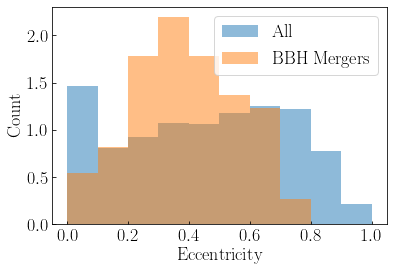

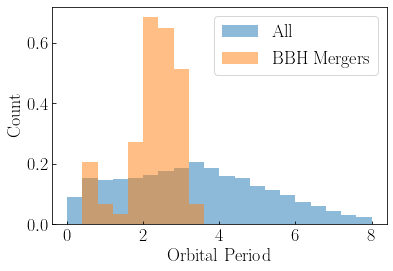

In [80]:
plt.figure()
h1 = plt.hist(binaries_initCond["ecc"], bins=10, range=(0,1), density=True, label="All", alpha=0.5)
h2 = plt.hist(binaries_initCond["ecc"].loc[merging_binaries], bins=10, range=(0,1), density=True, label="BBH Mergers", alpha=0.5)
plt.xlabel("Eccentricity", size=18)
plt.ylabel("Count", size=18)
plt.legend(fontsize=18)
plt.gca().tick_params("both", labelsize=18)

plt.figure()
h1 = plt.hist(np.log10(binaries_initCond["porb"]), bins=20, range=(0,8), density=True, label="All", alpha=0.5)
h2 = plt.hist(np.log10(binaries_initCond["porb"].loc[merging_binaries]), bins=20, range=(0,8), density=True, label="BBH Mergers", alpha=0.5)
plt.xlabel("Orbital Period", size=18)
plt.ylabel("Count", size=18)
plt.legend(fontsize=18)
plt.gca().tick_params("both", labelsize=18)

### 6b) Make a histogram of only the primary masses you saved (the more massive BH). 

- remember, you were asked to save the index of the binaries that merged and the mass of the more massive black hole before the merger

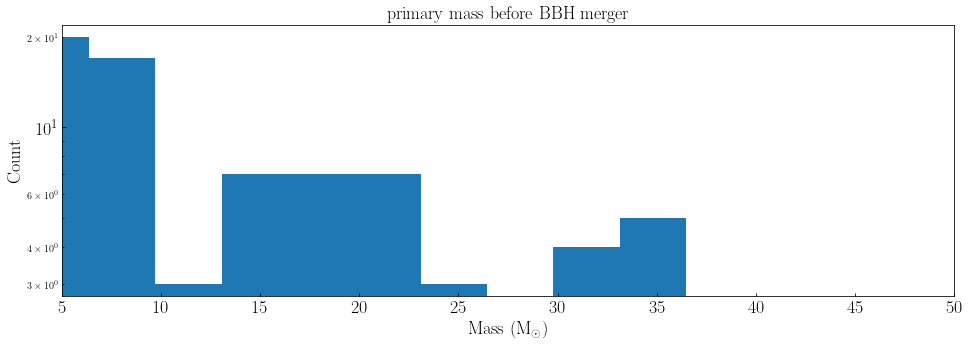

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

h = plt.hist(primary_mass)

ax.set_yscale('log')

ax.set_xlim(5,50)

ax.set_xlabel("Mass (M$_{\odot}$)", size=18)
ax.set_ylabel("Count", size=18)
ax.set_title('primary mass before BBH merger', size=18)

ax.tick_params("both", labelsize=18)

### 6c) compare your plot to this one. 

![primary_mass](https://www.ligo.org/science/Publication-O2BBHPop/images/fig2.png)



This plot shows the rate of BBH mergers per volume per year per primary mass. You can think of this plot as how likely you are to see a binary black hole merger with a specific primary mass. This plot was made using LIGO observations of real BBH mergers. The different colors correspond to different models. Each model has different assuptions, just to name a few: Model A assumed that BHs with masses below 5$M_{\odot}$ do not exist. Model B assumed a different initial distribution of black holes.


Your histogram is similar to this plot because a histogram can tell you there are many more mergers with primary masses around 5$M_{\odot}$. This is similar to saying, if you had to guess it is more likely you will see a BBH merger with a primary mass around 5$M_{\odot}$.

This is not a perfect comparison but it is good enough! **What comments can you make about it?** Remember you are comparing simulation data to data informed by real events!

This figure comes from this paper: https://dcc.ligo.org/public/0156/P1800324/009/O2RandP.pdf you don't have to read it. it is just for your reference

### 6d) Make a histogram of the mass ratio, q = secondary_mass/primary_mass

If your numbers are in an array you can simply divide the arrays. 

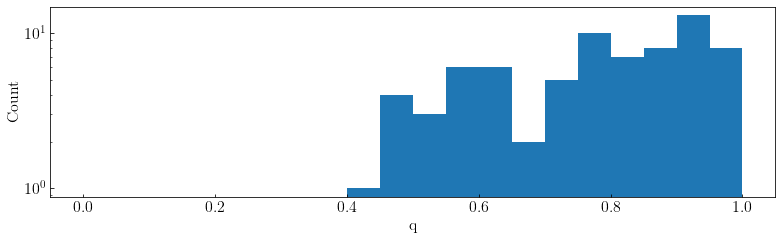

In [83]:
q = secondary_mass / primary_mass

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,3.5))

ax.hist(q, range=(0,1), bins=20)

ax.set_yscale("log")

ax.set_xlabel("q", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax.tick_params("both", labelsize=16)

### 6e) Compare your plot to this one



<img src="q_distribution.png">

This plot shows the rate of BBH mergers per volume per year per **mass ratio**. This is the same as the first plot. Again, you can think of this plot as how likely you are to see a binary black hole merger with a specific **mass ratio**. The colors here correspond to the same models as above. 


What comments can you make about this comparison? Do any of the models look similar to your histogram?


### 6f) Read this short article on the mass distribution of the resulting BH mass after a merger.

https://aasnova.org/2019/07/10/exploring-a-black-hole-mass-conundrum/



### 6g) Make a histogram of the resulting BH mass in each merger.

If your numbers are in an array you can simply add them. Adding arrays will add the numbers element by element

In [72]:
total_mass = primary_mass + secondary_mass


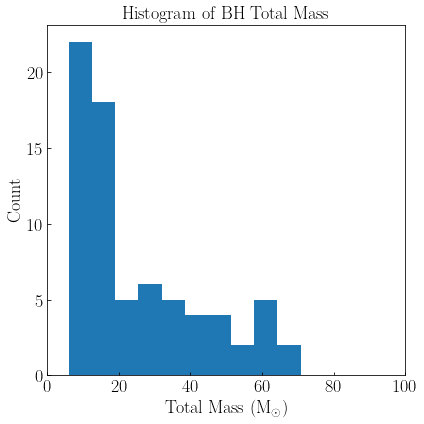

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

h = ax.hist(total_mass)

ax.set_xlabel("Total Mass (M$_{\odot}$)", size=18)
ax.set_ylabel("Count", size=18)
ax.set_title("Histogram of BH Total Mass", size=18)

ax.set_xlim(0,100)

ax.tick_params("both", labelsize=18)

fig.tight_layout()

### 6h) Compare your plot to this




<img src="https://3iom3142cnb81rlnt6w4mtlr-wpengine.netdna-ssl.com/wp-content/uploads/2019/07/apjlab2336f5_hr.jpg" style="width:30vw">

This is the last plot from the article you read.

It comes from this scientific paper https://arxiv.org/pdf/1901.03345.pdf. You don't have to read this

In this plot the y-axis shows a similar idea to the last image. It shows model predictions for the distribution of the observed total mass of 10 mergers. Similar to the last image you can think of it as how likely it is to see a certain distribution of total final BH masses. The different colors are again different models. The black line is informed by the observed values from LIGO detections.

This is not a perfect comparison but it is good enough! What comments can you make about your total mass distribution and the figure? What range do you have on the x-axis and what range does the other plot have?


## 7. Do this same comparison with the different initial populations I have provided. 
#### You do not have to redo all the poll questions.

#### This is meant for you to see how your results can change if you make different assumptions about the initial population.
#### Changing parameters like this is one way astronomers can tune their assumptions to better match observations. This helps us have a better understanding of the universe by ruling out assumptions that don't match observations.

**data_diff_imf.h5** has a completely different initial population of the binaries. The initial orbital periods, eccentricities, and mass ratios, among others.

**data_lowZ.h5** has a different metallicity. It is 100x smaller amount of metals

**data_wkicks.h5** this one includes "kicks". When stars explode as super nova the explosion can "kick" the remaining black hole.

## Which file gave a better comparison to the plots from scientific papers?
## Answer the final poll (yay!), Poll #8.  